# Setup Notebook:

In [1]:
# Standard imports
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , classification_report , confusion_matrix
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

# Local imports

In [2]:
sns.set_theme()

# Load Data:

In [3]:
data = datasets.load_iris()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data["DESCR"]

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
data["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Create A Pandas DataFrame From The Data:

In [10]:
df = pd.DataFrame(data["data"] , columns = data["feature_names"])

In [11]:
df["target"] = data["target"]

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic Descriptive Statistics:

In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Distributions Of Features And Target:

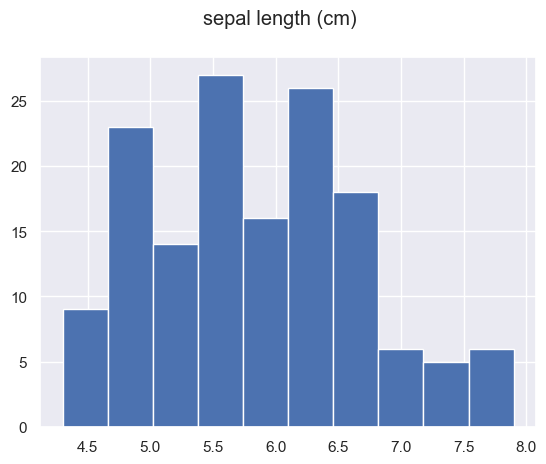

In [14]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

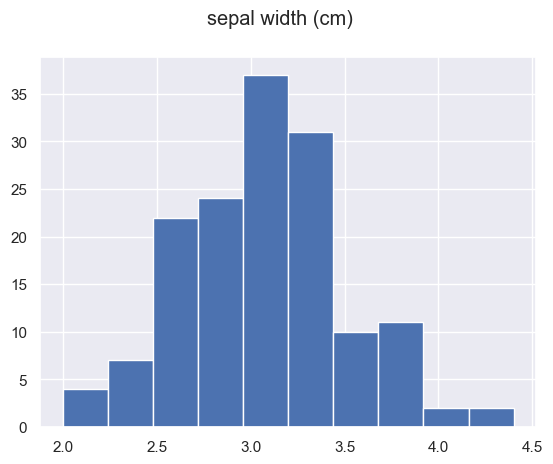

In [15]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

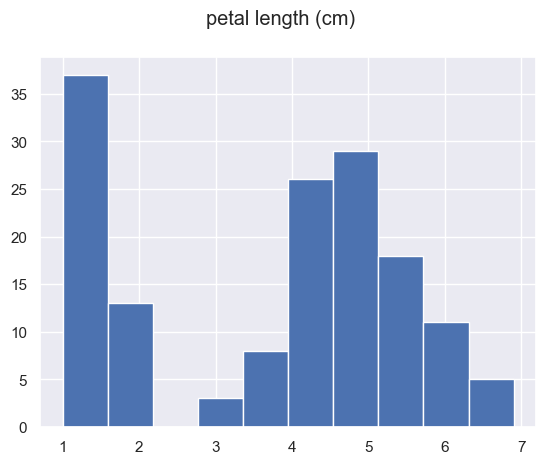

In [16]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

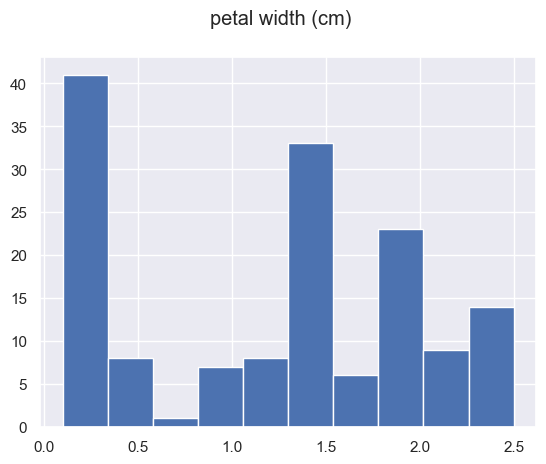

In [17]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

# Relationship Of The Data Features With The Target:

In [18]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
# Create New Column With the Species Name
df["target_name"] = df["target"].map({0 : "setosa" , 1 : "versicolor" , 2 : "virginica"})

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


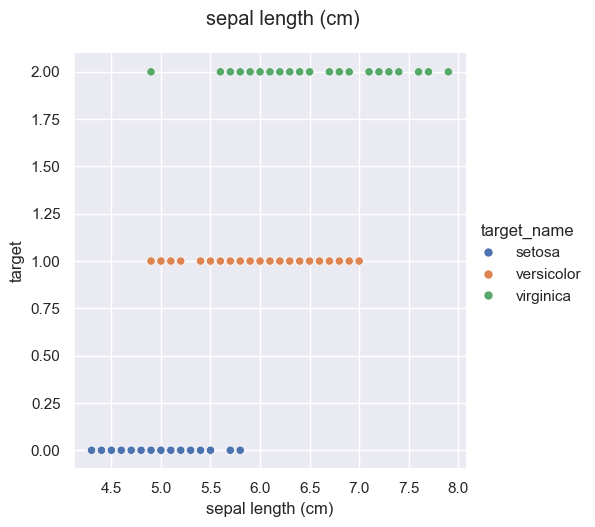

In [21]:
col = "sepal length (cm)"
sns.relplot(x = col , y = "target" , hue = "target_name" , data = df)
_ = plt.suptitle(col , y = 1.05)

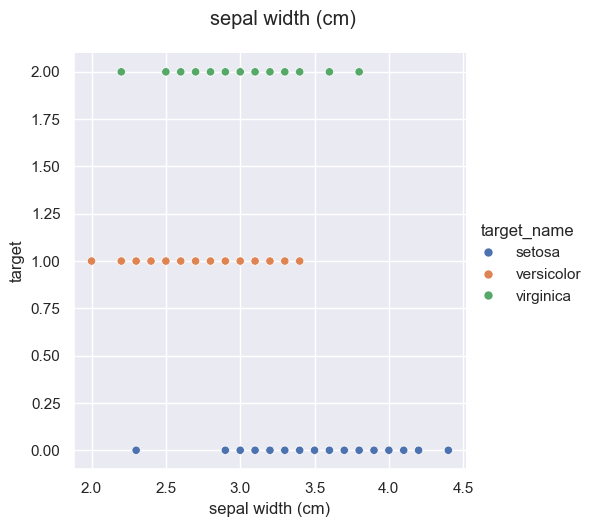

In [22]:
col = "sepal width (cm)"
sns.relplot(x = col , y = "target" , hue = "target_name" , data = df)
_ = plt.suptitle(col , y = 1.05)

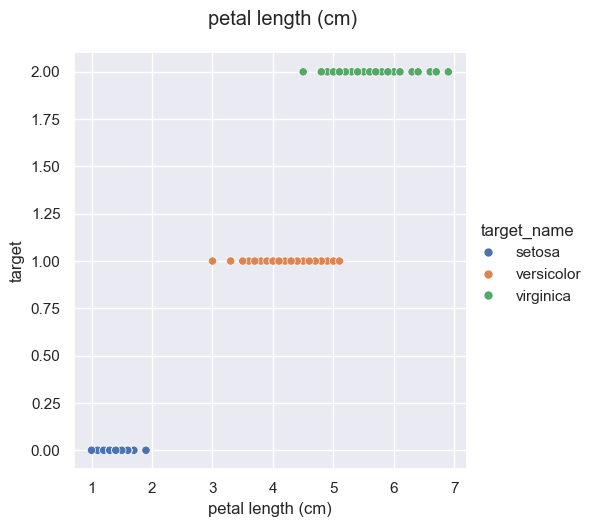

In [23]:
col = "petal length (cm)"
sns.relplot(x = col , y = "target" , hue = "target_name" , data = df)
_ = plt.suptitle(col , y = 1.05)

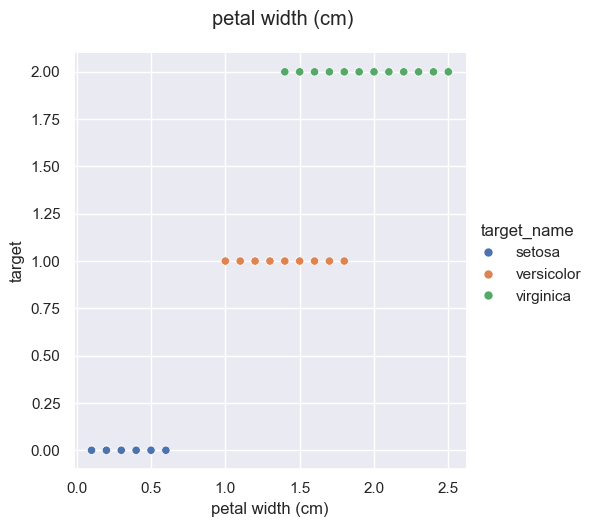

In [24]:
col = "petal width (cm)"
sns.relplot(x = col , y = "target" , hue = "target_name" , data = df)
_ = plt.suptitle(col , y = 1.05)

# Exploratory Data Analisys (EDA) - Pairplots:

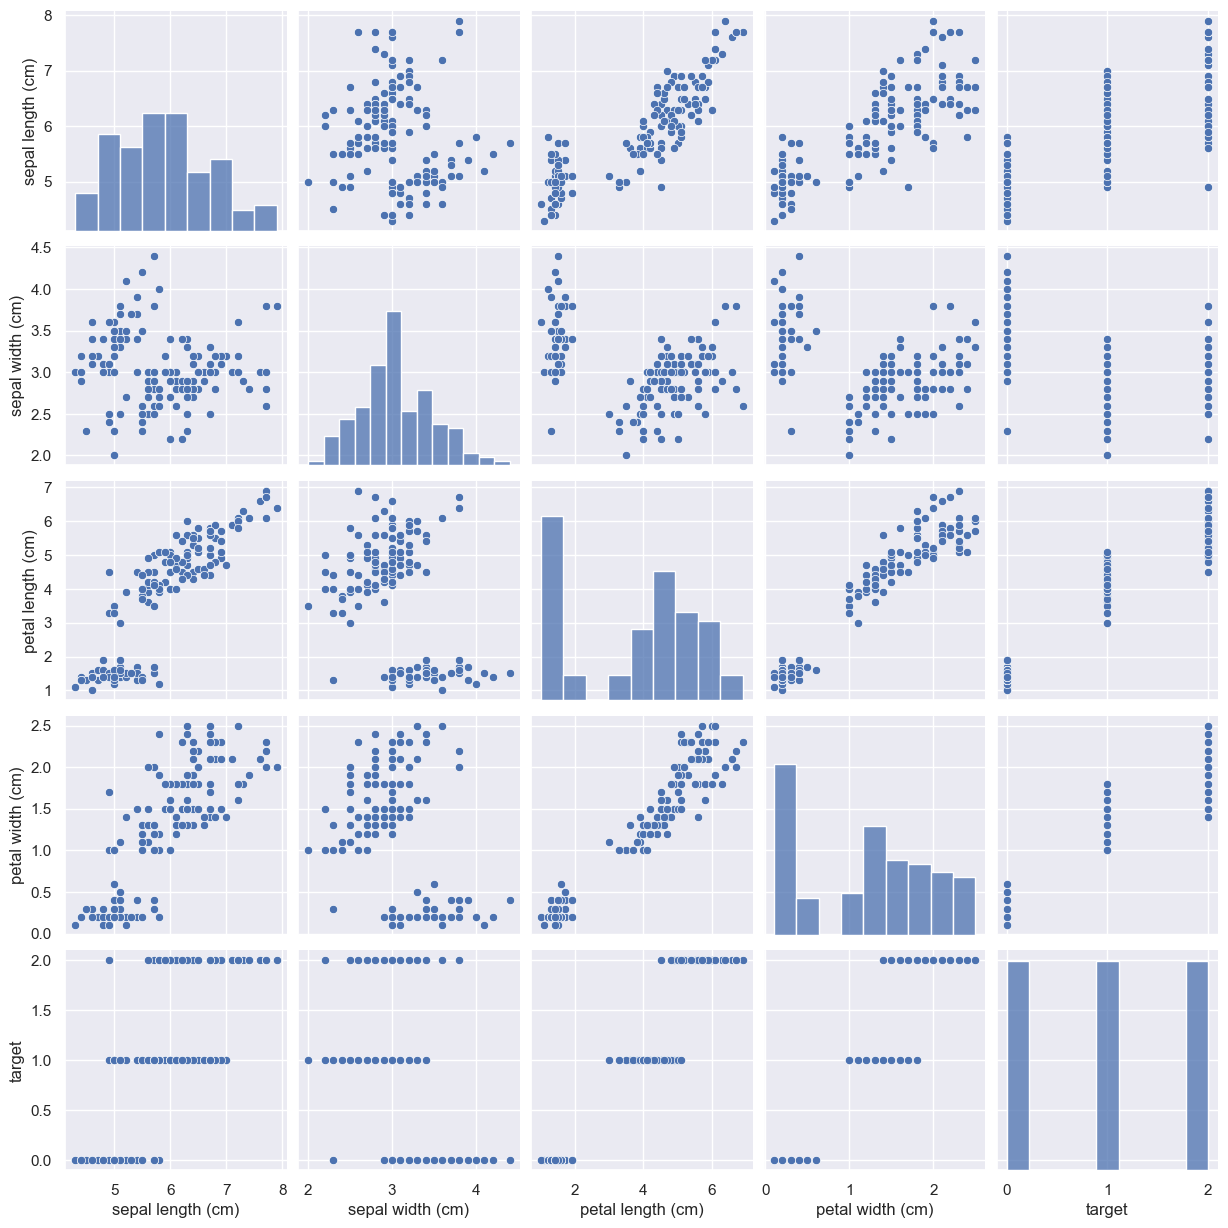

In [25]:
sns.pairplot(df)

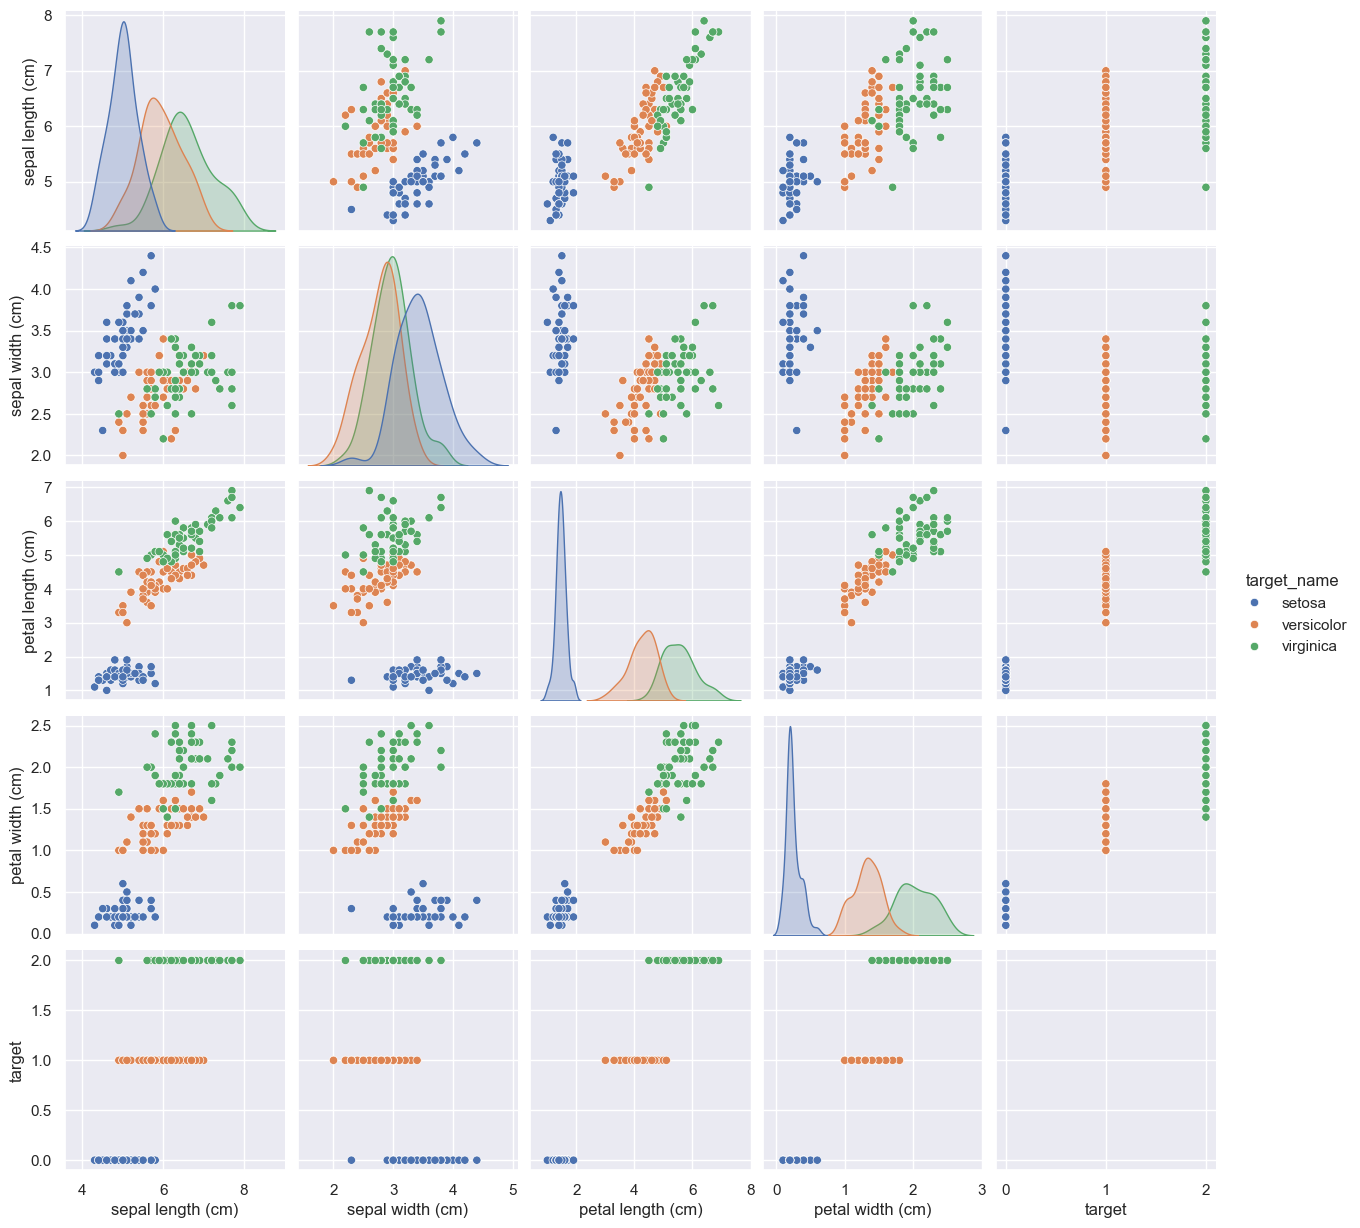

In [26]:
sns.pairplot(df , hue = "target_name")

# Train-Test Split:

In [27]:
df_train , df_test = train_test_split(df , test_size = 0.25)

In [28]:
df_train.shape

(112, 6)

In [29]:
df_test.shape

(38, 6)

In [30]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
75,6.6,3.0,4.4,1.4,1,versicolor
67,5.8,2.7,4.1,1.0,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
130,7.4,2.8,6.1,1.9,2,virginica
63,6.1,2.9,4.7,1.4,1,versicolor


# Prepare Our Data For Modeling:

In [31]:
x_train = df_train.drop(columns = ["target" , "target_name"]).values
y_train = df_train["target"].values

In [32]:
x_train

array([[6.6, 3. , 4.4, 1.4],
       [5.8, 2.7, 4.1, 1. ],
       [5.4, 3.9, 1.3, 0.4],
       [7.4, 2.8, 6.1, 1.9],
       [6.1, 2.9, 4.7, 1.4],
       [6.4, 2.8, 5.6, 2.2],
       [5.2, 3.4, 1.4, 0.2],
       [5.9, 3. , 4.2, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [7.1, 3. , 5.9, 2.1],
       [5.8, 2.7, 5.1, 1.9],
       [6.9, 3.2, 5.7, 2.3],
       [4.4, 3. , 1.3, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.9, 5.6, 1.8],
       [5.1, 3.8, 1.5, 0.3],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3. , 1.4, 0.1],
       [6.7, 3.3, 5.7, 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [6.1, 3. , 4.6, 1.4],
       [4.4, 3.2, 1.3, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [7.7, 2.8, 6.7, 2. ],
       [4.6, 3.2, 1.4, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [4.9, 3. , 1.4, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3. , 1.4, 0.3],
       [6.7, 3.1, 5.6, 2.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.2, 2

In [33]:
x_train.shape

(112, 4)

In [34]:
y_train

array([1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0,
       1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 2])

In [35]:
y_train.shape

(112,)

# Modeling - Simple Manual Model:

In [36]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
def single_feature_predictions(petal_length):
    '''Predicts The Iris Species Given The Petal Length'''
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [38]:
df_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

In [39]:
x_train[: , 2]

array([4.4, 4.1, 1.3, 6.1, 4.7, 5.6, 1.4, 4.2, 4.8, 4.9, 5.9, 5.1, 5.7,
       1.3, 5.2, 5.6, 1.5, 1.1, 1.4, 5.7, 5.1, 4.6, 1.3, 5.5, 3. , 6.7,
       1.4, 5.8, 1.4, 1.7, 1.4, 5.6, 1.5, 1.4, 3.9, 4.5, 1.4, 4.5, 5.3,
       4.8, 5. , 6.9, 6.6, 1.2, 4.2, 4.6, 1.5, 5.9, 1.3, 1.5, 5.8, 4.2,
       1.9, 1.5, 1.9, 3.6, 3.3, 5.7, 4.5, 4.3, 6.1, 1.6, 1.5, 1.3, 6. ,
       5.6, 5.3, 4.9, 1.5, 5. , 4. , 1.3, 3.8, 6. , 4.9, 3.5, 1.5, 4. ,
       1.4, 1.5, 4.7, 1.7, 4.7, 1.3, 5.1, 4.3, 1.5, 3.9, 1.6, 5.8, 4.5,
       5.2, 1.4, 1.5, 1.7, 1.6, 4.1, 5.1, 4.4, 5.6, 4.1, 1.4, 1.2, 1.6,
       5.6, 4.9, 6.7, 6.1, 1.7, 4. , 6.4, 5. ])

In [40]:
df_train["petal length (cm)"].values

array([4.4, 4.1, 1.3, 6.1, 4.7, 5.6, 1.4, 4.2, 4.8, 4.9, 5.9, 5.1, 5.7,
       1.3, 5.2, 5.6, 1.5, 1.1, 1.4, 5.7, 5.1, 4.6, 1.3, 5.5, 3. , 6.7,
       1.4, 5.8, 1.4, 1.7, 1.4, 5.6, 1.5, 1.4, 3.9, 4.5, 1.4, 4.5, 5.3,
       4.8, 5. , 6.9, 6.6, 1.2, 4.2, 4.6, 1.5, 5.9, 1.3, 1.5, 5.8, 4.2,
       1.9, 1.5, 1.9, 3.6, 3.3, 5.7, 4.5, 4.3, 6.1, 1.6, 1.5, 1.3, 6. ,
       5.6, 5.3, 4.9, 1.5, 5. , 4. , 1.3, 3.8, 6. , 4.9, 3.5, 1.5, 4. ,
       1.4, 1.5, 4.7, 1.7, 4.7, 1.3, 5.1, 4.3, 1.5, 3.9, 1.6, 5.8, 4.5,
       5.2, 1.4, 1.5, 1.7, 1.6, 4.1, 5.1, 4.4, 5.6, 4.1, 1.4, 1.2, 1.6,
       5.6, 4.9, 6.7, 6.1, 1.7, 4. , 6.4, 5. ])

In [41]:
manual_y_predictions = np.array([single_feature_predictions(val) for val in x_train[: , 2]])

In [42]:
manual_y_predictions

array([1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 0,
       1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 2])

In [43]:
y_train

array([1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0,
       1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 2])

In [44]:
manual_y_predictions == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [45]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)
print(f'Manual Model Accuracy: {manual_model_accuracy * 100 : .2f}%')

Manual Model Accuracy:  96.43%


In [46]:
accuracy = accuracy_score(y_train , manual_y_predictions)
precision = precision_score(y_train , manual_y_predictions , average = 'weighted')
recall = recall_score(y_train , manual_y_predictions , average = 'weighted')
f1 = f1_score(y_train , manual_y_predictions , average = 'weighted')

In [47]:
report = classification_report(y_train , manual_y_predictions , target_names = data["target_names"])
print(f"Accuracy = {accuracy * 100 : .2f}%")
print(f"Precision = {precision * 100 : .2f}%")
print(f"Recall = {recall * 100 : .2f}%")
print(f"F1 - Score = {f1 * 100 : .2f}%")
print("\nClassification Report:\n" , report)

Accuracy =  96.43%
Precision =  96.77%
Recall =  96.43%
F1 - Score =  96.40%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       1.00      0.88      0.94        33
   virginica       0.90      1.00      0.95        38

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.97      0.96      0.96       112



In [48]:
cm = confusion_matrix(y_train , manual_y_predictions)

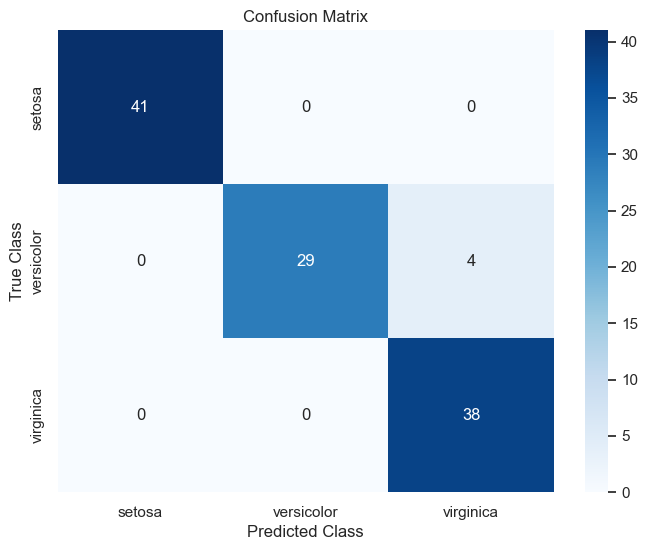

In [49]:
plt.figure(figsize = (8 , 6))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = data["target_names"] , yticklabels = data["target_names"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Modeling - Logistic Regression:

In [50]:
model = LogisticRegression(max_iter = 200)
model.fit(x_train , y_train)

LogisticRegression(max_iter=200)

In [51]:
model.score(x_train , y_train)

0.9821428571428571

# Validation Model:

In [52]:
xt , xv , yt , yv = train_test_split(x_train , y_train , test_size = 0.25)

In [53]:
xt.shape

(84, 4)

In [54]:
xv.shape

(28, 4)

In [55]:
model.fit(xt , yt)
y_pred = model.predict(xv)

In [56]:
y_pred == yv

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [57]:
np.mean(y_pred == yv)

0.9285714285714286

In [58]:
model.score(xv , yv)

0.9285714285714286

In [59]:
accuracy = accuracy_score(yv , y_pred)
precision = precision_score(yv , y_pred , average = 'weighted')
recall = recall_score(yv , y_pred , average = 'weighted')
f1 = f1_score(yv , y_pred , average = 'weighted')

In [60]:
report = classification_report(yv , y_pred , target_names = data["target_names"])
print(f"Accuracy = {accuracy * 100 : .2f}%")
print(f"Precision = {precision * 100 : .2f}%")
print(f"Recall = {recall * 100 : .2f}%")
print(f"F1 - Score = {f1 * 100 : .2f}%")
print("\nClassification Report:\n" , report)

Accuracy =  92.86%
Precision =  94.29%
Recall =  92.86%
F1 - Score =  92.90%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.80      1.00      0.89         8
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        28
   macro avg       0.93      0.94      0.93        28
weighted avg       0.94      0.93      0.93        28



In [61]:
cm = confusion_matrix(yv , y_pred)

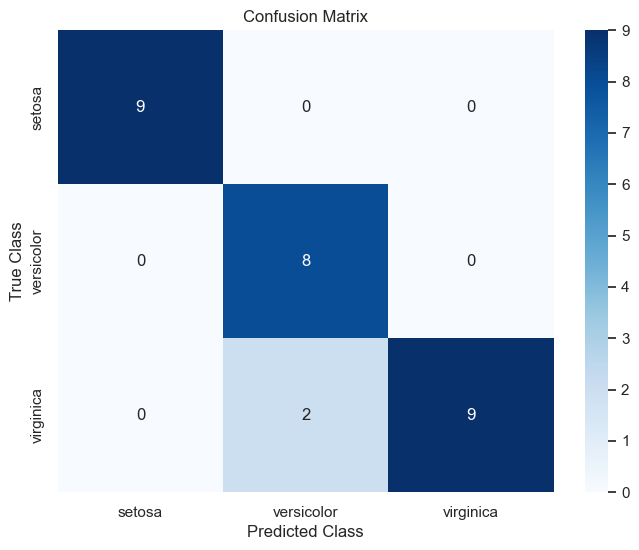

In [62]:
plt.figure(figsize = (8 , 6))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = data["target_names"] , yticklabels = data["target_names"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Using Cross-Validation To Evaluate Our Model:

In [63]:
accuracies = cross_val_score(model , x_train , y_train , cv = 5 , scoring = "accuracy")
print(accuracies)

[0.95652174 1.         0.95454545 0.95454545 0.95454545]


In [64]:
np.mean(accuracies)

0.9640316205533598

In [65]:
y_pred = cross_val_predict(model , x_train , y_train , cv = 5)
print(y_pred)

[1 1 0 2 1 2 0 1 1 2 2 2 2 0 2 2 0 0 0 2 2 1 0 2 1 2 0 2 0 0 0 2 0 0 1 1 0
 1 2 1 2 2 2 0 1 1 0 2 0 0 2 1 0 0 0 1 1 2 1 1 2 0 0 0 2 2 2 2 0 2 1 0 1 2
 1 1 0 1 0 0 1 0 1 0 2 1 0 1 0 2 1 2 0 0 0 0 1 2 1 2 1 0 0 0 2 2 2 2 0 1 2
 1]


In [66]:
y_pred == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False])

In [67]:
np.mean(y_pred == y_train)

0.9642857142857143

In [68]:
predicted_correctly_mask = y_pred == y_train

In [69]:
x_train[predicted_correctly_mask]

array([[6.6, 3. , 4.4, 1.4],
       [5.8, 2.7, 4.1, 1. ],
       [5.4, 3.9, 1.3, 0.4],
       [7.4, 2.8, 6.1, 1.9],
       [6.1, 2.9, 4.7, 1.4],
       [6.4, 2.8, 5.6, 2.2],
       [5.2, 3.4, 1.4, 0.2],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 3. , 4.9, 1.8],
       [7.1, 3. , 5.9, 2.1],
       [5.8, 2.7, 5.1, 1.9],
       [6.9, 3.2, 5.7, 2.3],
       [4.4, 3. , 1.3, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.9, 5.6, 1.8],
       [5.1, 3.8, 1.5, 0.3],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3. , 1.4, 0.1],
       [6.7, 3.3, 5.7, 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [6.1, 3. , 4.6, 1.4],
       [4.4, 3.2, 1.3, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [7.7, 2.8, 6.7, 2. ],
       [4.6, 3.2, 1.4, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [4.9, 3. , 1.4, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3. , 1.4, 0.3],
       [6.7, 3.1, 5.6, 2.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.4, 3

In [70]:
not_predicted_correctly = ~predicted_correctly_mask
print(not_predicted_correctly)

[False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True]


In [71]:
x_train[not_predicted_correctly]

array([[6.2, 2.8, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [6. , 2.2, 5. , 1.5]])

In [72]:
accuracy = accuracy_score(y_train , y_pred)
precision = precision_score(y_train , y_pred , average = 'weighted')
recall = recall_score(y_train , y_pred , average = 'weighted')
f1 = f1_score(y_train , y_pred , average = 'weighted')

In [73]:
report = classification_report(y_train , y_pred , target_names = data["target_names"])
print(f"Accuracy = {accuracy * 100 : .2f}%")
print(f"Precision = {precision * 100 : .2f}%")
print(f"Recall = {recall * 100 : .2f}%")
print(f"F1 - Score = {f1 * 100 : .2f}%")
print("\nClassification Report:\n" , report)

Accuracy =  96.43%
Precision =  96.43%
Recall =  96.43%
F1 - Score =  96.43%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.94      0.94      0.94        33
   virginica       0.95      0.95      0.95        38

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



In [74]:
cm = confusion_matrix(y_train , y_pred)

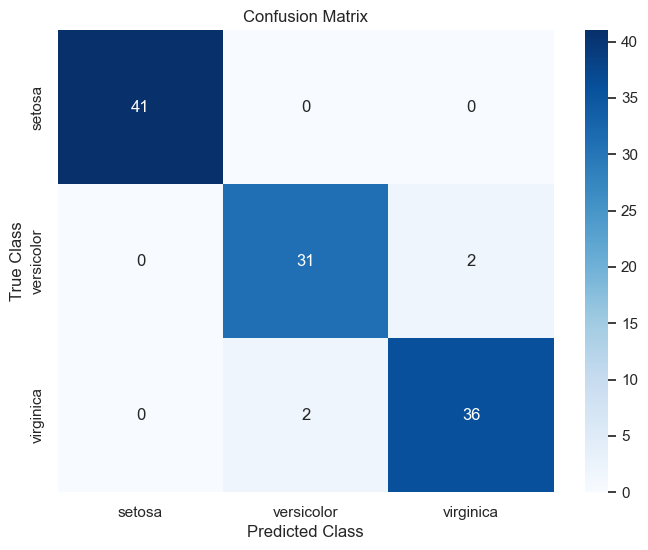

In [75]:
plt.figure(figsize = (8 , 6))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = data["target_names"] , yticklabels = data["target_names"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [76]:
df_predictions = df_train.copy()

In [77]:
df_predictions["correct_prediction"] = predicted_correctly_mask

In [78]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction
75,6.6,3.0,4.4,1.4,1,versicolor,True
67,5.8,2.7,4.1,1.0,1,versicolor,True
16,5.4,3.9,1.3,0.4,0,setosa,True
130,7.4,2.8,6.1,1.9,2,virginica,True
63,6.1,2.9,4.7,1.4,1,versicolor,True


In [79]:
df_predictions["predictions"] = y_pred

In [80]:
df_predictions["prediction_lable"] = df_predictions["predictions"].map({0 : "setosa" , 1 : "versicolor" , 2 : "virginica"})

In [81]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,predictions,prediction_lable
75,6.6,3.0,4.4,1.4,1,versicolor,True,1,versicolor
67,5.8,2.7,4.1,1.0,1,versicolor,True,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa,True,0,setosa
130,7.4,2.8,6.1,1.9,2,virginica,True,2,virginica
63,6.1,2.9,4.7,1.4,1,versicolor,True,1,versicolor


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

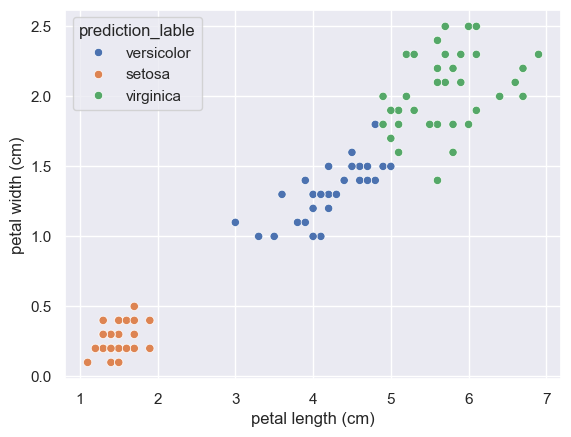

In [82]:
sns.scatterplot(x = "petal length (cm)" , y = "petal width (cm)" , hue = "prediction_lable" , data = df_predictions)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

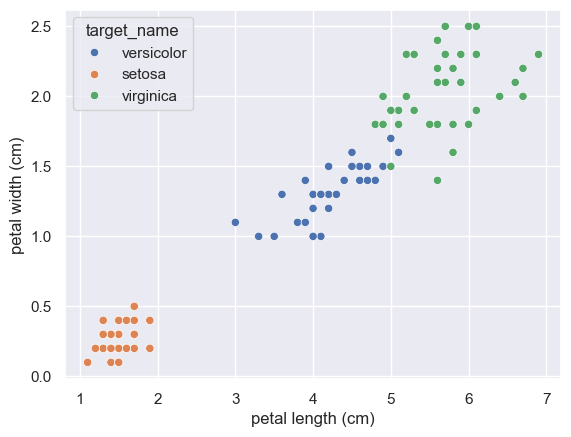

In [83]:
sns.scatterplot(x = "petal length (cm)" , y = "petal width (cm)" , hue = "target_name" , data = df_predictions)

In [84]:
def plot_incorrect_predictions(df_predictions , x_axis_feature , y_axis_feature):
    fig , axs = plt.subplots(2 , 2 , figsize = (10 , 10))
    axs = axs.flatten()
    sns.scatterplot(x = x_axis_feature , y = y_axis_feature , hue = "prediction_lable" , data = df_predictions , ax = axs[0])
    sns.scatterplot(x = x_axis_feature , y = y_axis_feature , hue = "target_name" , data = df_predictions , ax = axs[1])
    sns.scatterplot(x = x_axis_feature , y = y_axis_feature , hue = "correct_prediction" , data = df_predictions , ax = axs[2])
    axs[3].set_visible(False)

    plt.show()

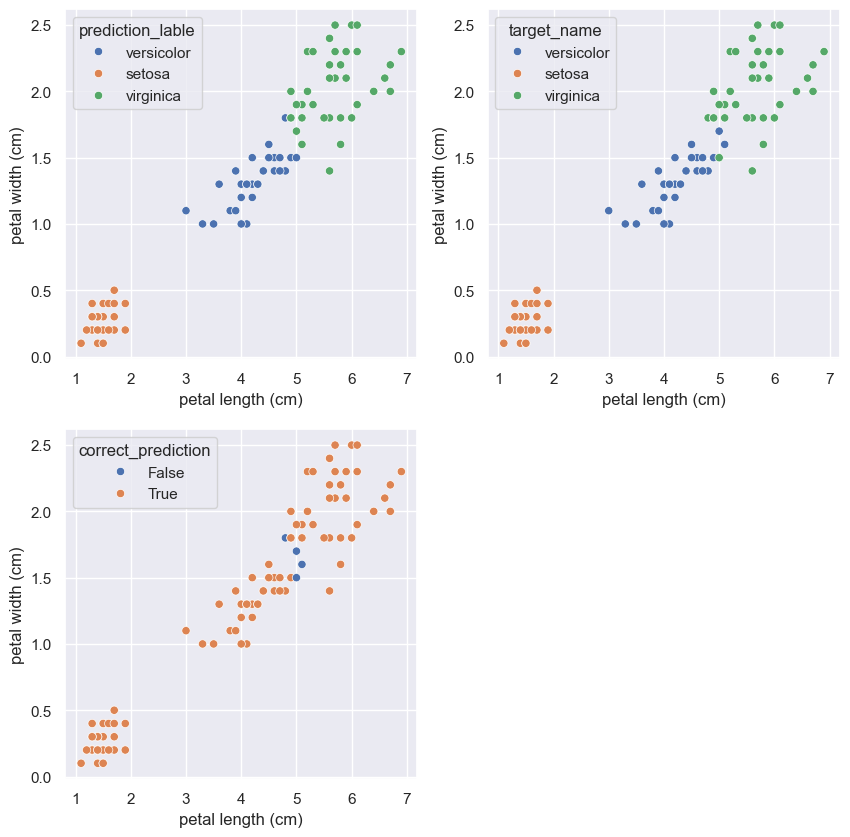

In [85]:
plot_incorrect_predictions(df_predictions , "petal length (cm)" , "petal width (cm)")

# Model Tuning:

In [86]:
model = RandomForestClassifier()
accs = cross_val_score(model , x_train , y_train , cv = 5 , scoring = "accuracy")
np.mean(accs)

0.9636363636363636

In [87]:
for reg_param in (1 , 1.3 , 2 , 3 , 4 , 4.3 , 5 , 10):
    print(reg_param)
    model = LogisticRegression(max_iter = 200 , C = reg_param)
    accuracies = cross_val_score(model , x_train , y_train , cv = 5 , scoring = "accuracy")
    print(f"Accuracy: {np.mean(accuracies) * 100 : .2f}%")

1
Accuracy:  96.40%
1.3
Accuracy:  96.40%
2
Accuracy:  96.40%
3
Accuracy:  96.40%
4
Accuracy:  96.40%
4.3
Accuracy:  96.40%
5
Accuracy:  96.40%
10
Accuracy:  96.40%


# Final Models:

In [88]:
x_test = df_test.drop(columns = ["target" , "target_name"]).values
y_test = df_test["target"].values

In [89]:
x_test.shape

(38, 4)

## Train Our Final Model Using Our Full Trainig DataSet:

In [90]:
lr = LogisticRegression(max_iter = 100 , C = 3)

model = lr.fit(x_train , y_train)
y_test_pred = model.predict(x_test)

cm = confusion_matrix(y_test , y_test_pred)

C:\Users\IzadKhah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
y_test_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [92]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [93]:
print(f"Test Set Accuracy: {test_set_accuracy * 100 : .2f}%")

Test Set Accuracy:  97.37%


In [94]:
test_set_correctly_classified

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [95]:
accuracy = accuracy_score(y_test , y_test_pred)
precision = precision_score(y_test , y_test_pred , average = 'weighted')
recall = recall_score(y_test , y_test_pred , average = 'weighted')
f1 = f1_score(y_test , y_test_pred , average = 'weighted')

In [96]:
report = classification_report(y_test , y_test_pred , target_names = data["target_names"])
print(f"Accuracy = {accuracy * 100 : .2f}%")
print(f"Precision = {precision * 100 : .2f}%")
print(f"Recall = {recall * 100 : .2f}%")
print(f"F1 - Score = {f1 * 100 : .2f}%")
print("\nClassification Report:\n" , report)

Accuracy =  97.37%
Precision =  97.57%
Recall =  97.37%
F1 - Score =  97.38%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.94      0.97        17
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



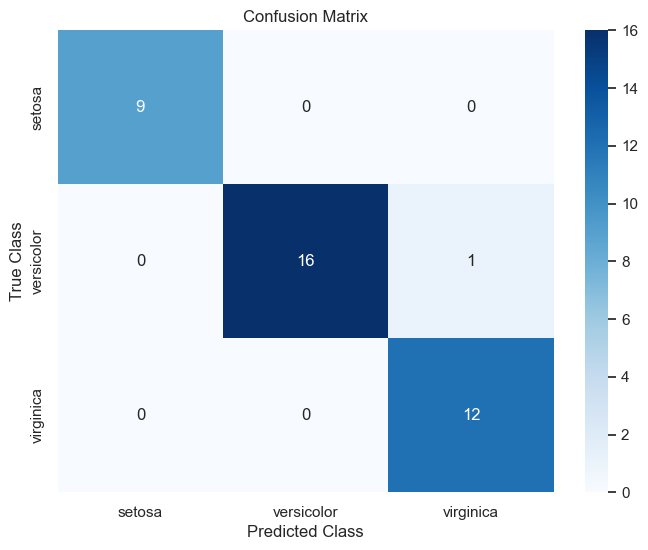

In [97]:
plt.figure(figsize=(8 , 6))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = data["target_names"] , yticklabels = data["target_names"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [98]:
df_predictions_test = df_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["predictions"] = y_test_pred
df_predictions_test["prediction_lable"] = df_predictions_test["predictions"].map({0 : "setosa" , 1 : "versicolor" , 2 : "virginica"})

In [99]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,predictions,prediction_lable
78,6.0,2.9,4.5,1.5,1,versicolor,True,1,versicolor
90,5.5,2.6,4.4,1.2,1,versicolor,True,1,versicolor
139,6.9,3.1,5.4,2.1,2,virginica,True,2,virginica
73,6.1,2.8,4.7,1.2,1,versicolor,True,1,versicolor
82,5.8,2.7,3.9,1.2,1,versicolor,True,1,versicolor


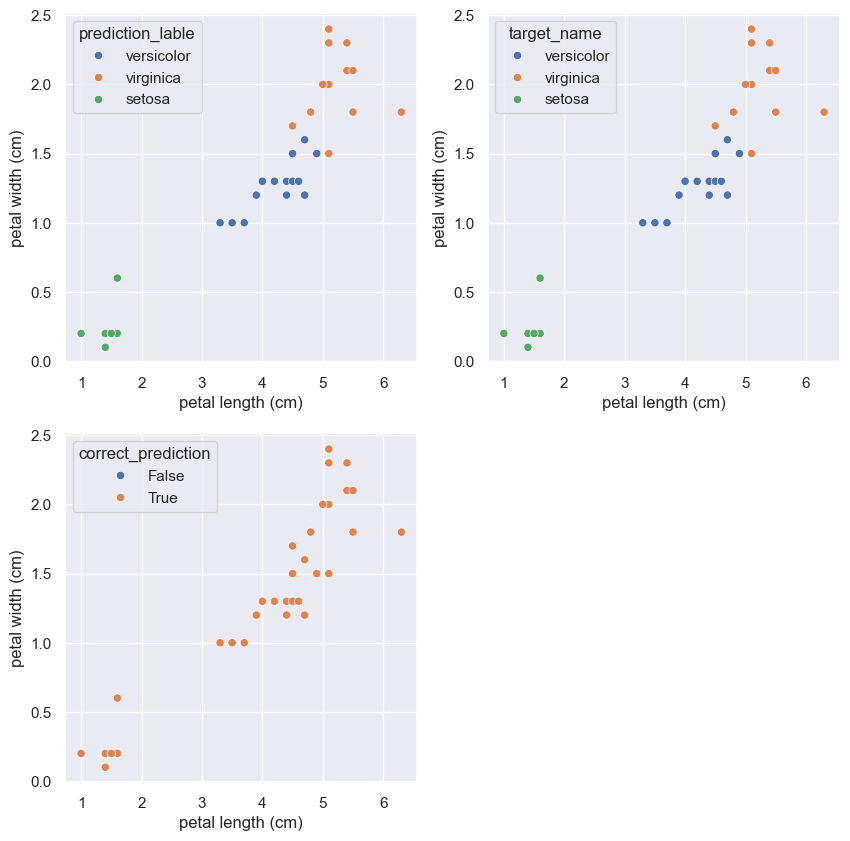

In [100]:
plot_incorrect_predictions(df_predictions_test , x_axis_feature = "petal length (cm)" , y_axis_feature = "petal width (cm)")

### Feature Scaling:

In [101]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

### Modeling - K-Nearest Neighbor:

In [102]:
knn = neighbors.KNeighborsClassifier()

model = knn.fit(x_train , y_train)
y_test_pred = model.predict(x_test)

cm = confusion_matrix(y_test , y_test_pred)

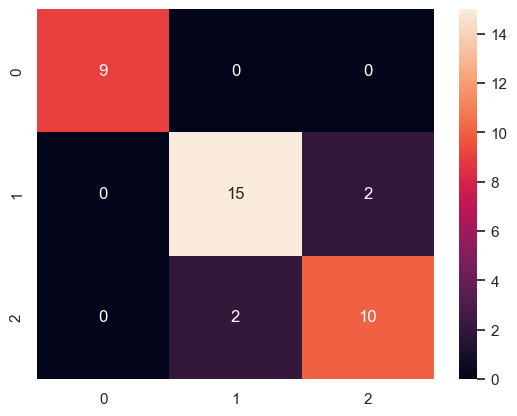

In [103]:
sns.heatmap(cm , annot = True)
plt.savefig("h.png")

In [104]:
accuracy = accuracy_score(y_test , y_test_pred)
precision = precision_score(y_test , y_test_pred , average = 'weighted')
recall = recall_score(y_test , y_test_pred , average = 'weighted')
f1 = f1_score(y_test , y_test_pred , average = 'weighted')

In [105]:
report = classification_report(y_test , y_test_pred , target_names = data["target_names"])
print(f"Accuracy = {accuracy * 100 : .2f}%")
print(f"Precision = {precision * 100 : .2f}%")
print(f"Recall = {recall * 100 : .2f}%")
print(f"F1 - Score = {f1 * 100 : .2f}%")
print("\nClassification Report:\n" , report)

Accuracy =  89.47%
Precision =  89.47%
Recall =  89.47%
F1 - Score =  89.47%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.88      0.88      0.88        17
   virginica       0.83      0.83      0.83        12

    accuracy                           0.89        38
   macro avg       0.91      0.91      0.91        38
weighted avg       0.89      0.89      0.89        38



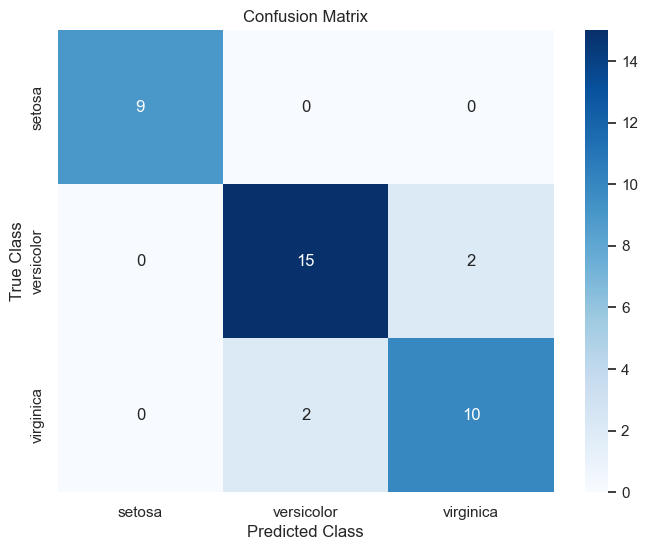

In [106]:
plt.figure(figsize=(8 , 6))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = data["target_names"] , yticklabels = data["target_names"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [107]:
knn_score = knn.score(x_train , y_train)
print(f"KNN Score is:{(knn_score * 100) : .2f}%")

KNN Score is: 98.21%


In [108]:
ne_neighbors = range(1 , 15)
training_accuracy = []
testing_accuracy = []

for n in ne_neighbors:
    knn = neighbors.KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train , y_train)
    training_accuracy.append(knn.score(x_train , y_train))
    testing_accuracy.append(knn.score(x_test , y_test))

[]

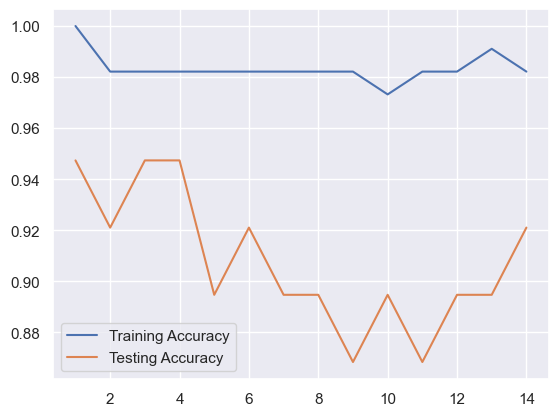

In [109]:
plt.plot(ne_neighbors , training_accuracy , label = "Training Accuracy")
plt.plot(ne_neighbors , testing_accuracy , label = "Testing Accuracy")
plt.legend()
plt.plot()

In [110]:
training_accuracy[13]

0.9821428571428571

In [111]:
testing_accuracy[13]

0.9210526315789473